## Importing the Data

In [54]:
import pandas as pd
import numpy as np
df= pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Handling Missing Data

In [55]:
df['Age'] = df['Age'].replace(np.NAN,df['Age'].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##  Determine if the survival rate is associated to the class of passenger

In [56]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from bioinfokit.analys import stat, get_data

# Contingency table.
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
print(contingency_table)


# run chi-square test for independence
res = stat()
res.chisq(df=contingency_table)

# output
print(res.summary)

# Chi-square test of independence.
stat, p, dof, expected = chi2_contingency(contingency_table)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('We reject the Null Hypothesis therefore both the Variables are Dependent')
else:
	print('We fail to reject the Null Hypothesis therefore both the Variables are independent')

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       102.889  4.54925e-23
Log-likelihood     2       103.547  3.27362e-23

We reject the Null Hypothesis therefore both the Variables are Dependent


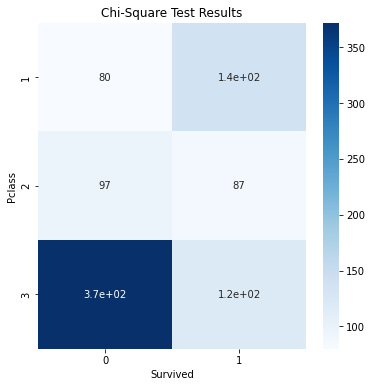

In [57]:
# Plotting a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6,6))
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

## Determine if the survival rate is associated to the gender

In [59]:
# Contingency table.
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
print(contingency_table)


# run chi-square test for independence
res.chisq(df=contingency_table)

# output
print(res.summary)

# Chi-square test of independence.
stat, p, dof, expected = chi2_contingency(contingency_table)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('We reject the Null Hypothesis therefore both the Variables are Dependent')
else:
	print('We fail to reject the Null Hypothesis therefore both the Variables are independent')

Survived    0    1
Sex               
female     81  233
male      468  109

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       260.717  1.19736e-58
Log-likelihood     1       266.344  7.10614e-60

We reject the Null Hypothesis therefore both the Variables are Dependent


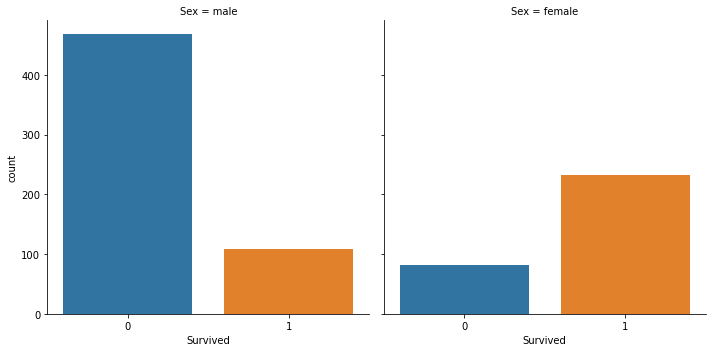

In [70]:
# creating the bar plot
sns.catplot(x='Survived',col='Sex',kind='count',data=df);

## Determine if the survival rate is associated to the Embarked

In [64]:
# Contingency table.
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])
print(contingency_table)


# run chi-square test for independence
res.chisq(df=contingency_table)

# output
print(res.summary)

# Chi-square test of independence.
stat, p, dof, expected = chi2_contingency(contingency_table)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('We reject the Null Hypothesis therefore both the Variables are Dependent')
else:
	print('We fail to reject the Null Hypothesis therefore both the Variables are independent')

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       26.4891  1.76992e-06
Log-likelihood     2       25.8653  2.41778e-06

We reject the Null Hypothesis therefore both the Variables are Dependent


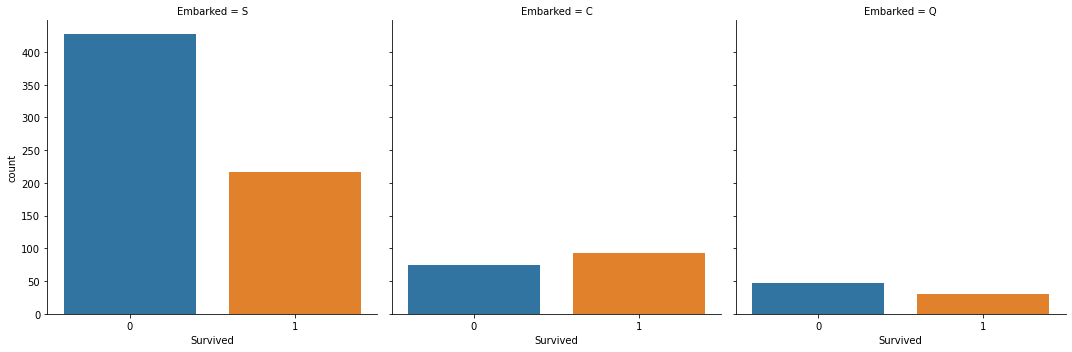

In [72]:
# creating the bar plot
sns.catplot(x='Survived',col='Embarked',kind='count',data=df);